In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from fbprophet import Prophet
import matplotlib as plt

In [46]:
# American Falls
americanfalls = pd.read_csv('americanfalls.csv', low_memory=False)
american_uptime =  (americanfalls.loc[(americanfalls['Super Reason'] == 'Uptime')].groupby(['Logical Date'])['Hours'].sum())/(len(americanfalls.Asset.unique()))
american_up_forecast = pd.DataFrame({'ds':american_uptime.index, 'y':american_uptime.values})
train = american_up_forecast.iloc[0:62]
test = american_up_forecast[63:79]
train['y'] = np.log(train['y'])
train.set_index('ds')

/home/geanderson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,y
ds,
2017-10-01,2.867855
2017-10-02,2.740511
2017-10-03,2.868619
2017-10-04,2.894889
2017-10-05,2.822325
2017-10-06,2.744101
2017-10-07,2.904156
2017-10-08,2.733797
2017-10-09,2.836828


In [47]:
m = Prophet()
m.fit(train)


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geanderson/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [67]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_adjust = np.exp(forecast[['yhat']])

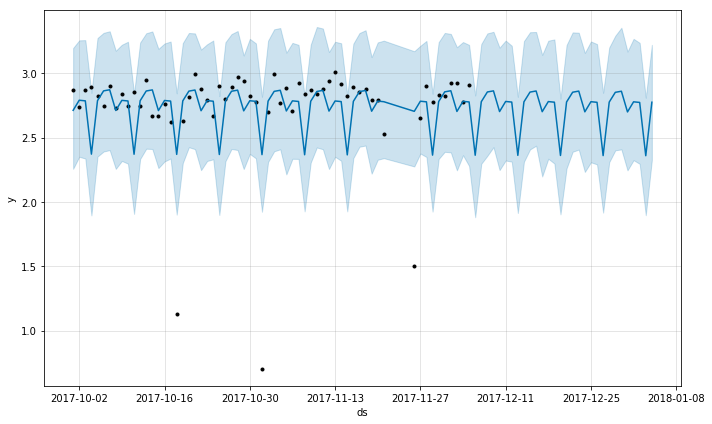

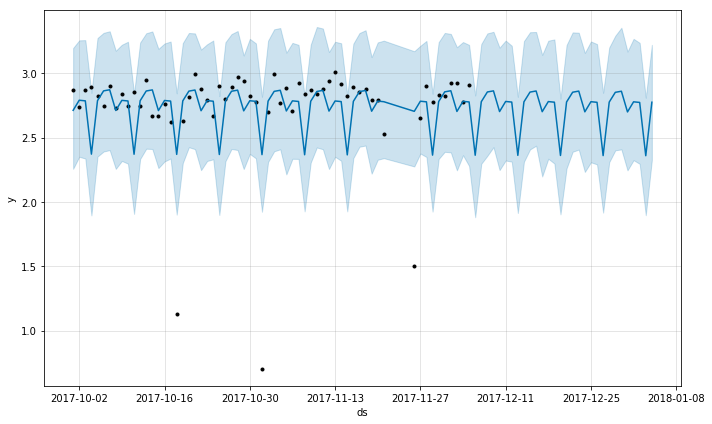

In [68]:
m.plot(forecast)

In [ ]:
accuracy_score

In [74]:
from sklearn.metrics import mean_absolute_error, accuracy_score
y_true = american_up_forecast.y
y_pred = forecast_adjust.yhat[0:79]

In [76]:
accuracy_score(y_true.round(0), y_pred.round(0))

0.012658227848101266

In [73]:
# MAE output is non-negative floating point. The best value is 0.0.
mean_absolute_error(y_true, y_pred)

10.848404003249717

In [65]:
# ROOT MEAN SQUARE output is non-negative floating point. The best value is 0.0.
rms = np.sqrt(np.mean((forecast.yhat)**2))

In [66]:
rms

2.736744544148801

In [58]:
forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yhat
0,2017-10-01,2.740765,2.740765,2.740765,2.262088,3.147517,-0.028840,-0.028840,-0.028840,-0.028840,-0.028840,-0.028840,-0.028840,-0.028840,-0.028840,2.711925
1,2017-10-02,2.740624,2.740624,2.740624,2.331303,3.239882,0.049891,0.049891,0.049891,0.049891,0.049891,0.049891,0.049891,0.049891,0.049891,2.790515
2,2017-10-03,2.740484,2.740484,2.740484,2.309803,3.259021,0.045294,0.045294,0.045294,0.045294,0.045294,0.045294,0.045294,0.045294,0.045294,2.785778
3,2017-10-04,2.740344,2.740344,2.740344,1.929222,2.825960,-0.368814,-0.368814,-0.368814,-0.368814,-0.368814,-0.368814,-0.368814,-0.368814,-0.368814,2.371530
4,2017-10-05,2.740204,2.740204,2.740204,2.304100,3.253645,0.047270,0.047270,0.047270,0.047270,0.047270,0.047270,0.047270,0.047270,0.047270,2.787474
5,2017-10-06,2.740064,2.740064,2.740064,2.373644,3.299409,0.123256,0.123256,0.123256,0.123256,0.123256,0.123256,0.123256,0.123256,0.123256,2.863320
6,2017-10-07,2.739924,2.739924,2.739924,2.430495,3.345993,0.131943,0.131943,0.131943,0.131943,0.131943,0.131943,0.131943,0.131943,0.131943,2.871868
7,2017-10-08,2.739784,2.739784,2.739784,2.231310,3.167158,-0.028840,-0.028840,-0.028840,-0.028840,-0.028840,-0.028840,-0.028840,-0.028840,-0.028840,2.710944
8,2017-10-09,2.739644,2.739644,2.739644,2.346715,3.271648,0.049891,0.049891,0.049891,0.049891,0.049891,0.049891,0.049891,0.049891,0.049891,2.789535
9,2017-10-10,2.739504,2.739504,2.739504,2.302180,3.253518,0.045294,0.045294,0.045294,0.045294,0.045294,0.045294,0.045294,0.045294,0.045294,2.784798


In [50]:
test

,ds,y
63,2017-12-07,17.679757
64,2017-12-08,16.273542
65,2017-12-09,17.169618
66,2017-12-10,16.758542
67,2017-12-11,14.952778
68,2017-12-12,3.345833
69,2017-12-13,16.596528
70,2017-12-14,16.811250
71,2017-12-15,18.517847
72,2017-12-16,18.268507


In [51]:
forecast_adjust['test'] = test.y

In [54]:
forecast_adjust['difference'] = forecast_adjust.yhat - forecast_adjust.test

In [55]:
forecast_adjust

,yhat,yhat_lower,yhat_upper,test,difference
0,15.058230,9.603122,23.278189,NaN,NaN
1,16.289412,10.291340,25.530710,NaN,NaN
2,16.212434,10.072445,26.024037,NaN,NaN
3,10.713773,6.884149,16.877136,NaN,NaN
4,16.239949,10.015160,25.884524,NaN,NaN
5,17.519603,10.736443,27.096624,NaN,NaN
6,17.669987,11.364508,28.388758,NaN,NaN
7,15.043474,9.312057,23.739919,NaN,NaN
8,16.273450,10.451181,26.354747,NaN,NaN
9,16.196547,9.995945,25.881243,NaN,NaN


In [43]:
test.shape

(79, 0)

In [42]:
forecast_adjust['test'] = test

ValueError: Wrong number of items passed 0, placement implies 1

In [28]:
type(american_up_forecast)

pandas.core.frame.DataFrame

In [29]:
train = american_up_forecast.iloc[:, :63]
test = american_up_forecast.iloc[:, 63:]

In [2]:
# American Falls
americanfalls = pd.read_csv('americanfalls.csv', low_memory=False)
american_uptime =  americanfalls.loc[(americanfalls['Super Reason'] == 'Uptime')]
# Boardman
boardman = pd.read_csv('boardman.csv', low_memory=False)
boardman_uptime =  boardman.loc[(boardman['Super Reason'] == 'Uptime')]
# Connell
connell = pd.read_csv('connell.csv', low_memory=False)
connell_uptime =  connell.loc[(connell['Super Reason'] == 'Uptime')]
# Delhi
delhi = pd.read_csv('delhi.csv', low_memory=False)
delhi_uptime =  delhi.loc[(delhi['Super Reason'] == 'Uptime')]
# Park Rapids
park_rapids = pd.read_csv('park_rapids.csv', low_memory=False)
park_rapids_uptime =  park_rapids.loc[(park_rapids['Super Reason'] == 'Uptime')]
# Pasco
pasco = pd.read_csv('pasco.csv', low_memory=False)
pasco_uptime =  pasco.loc[(pasco['Super Reason'] == 'Uptime')]
# Richland 
richland = pd.read_csv('richland.csv', low_memory=False)
richland_uptime =  richland.loc[(richland['Super Reason'] == 'Uptime')]

In [3]:
# American: create the features for model
y = american_downtime[['Minutes']]
X = american_downtime[['Asset', 'Super Reason', 'Reason Lvl1', 'Reason Lvl2', 'Shift', 'Hours']]
# dummy variables for categorical variables
X = pd.get_dummies(X)
# cross validation with train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0, solver='lsqr')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
american_predict = clf.predict(X_test)[0:30]
american_predict = pd.DataFrame(data=american_predict)

In [4]:
american_predict.plot(figsize=(16, 10))

In [5]:
# Boardman: create the features for model
y = boardman_downtime[['Minutes']]
X = boardman_downtime[['Asset', 'Super Reason', 'Reason Lvl1', 'Reason Lvl2', 'Shift', 'Hours']]
# dummy variables for categorical variables
X = pd.get_dummies(X)
# cross validation with train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0, solver='lsqr')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
boardman_predict = clf.predict(X_test)[0:30]
boardman_predict = pd.DataFrame(data=boardman_predict)

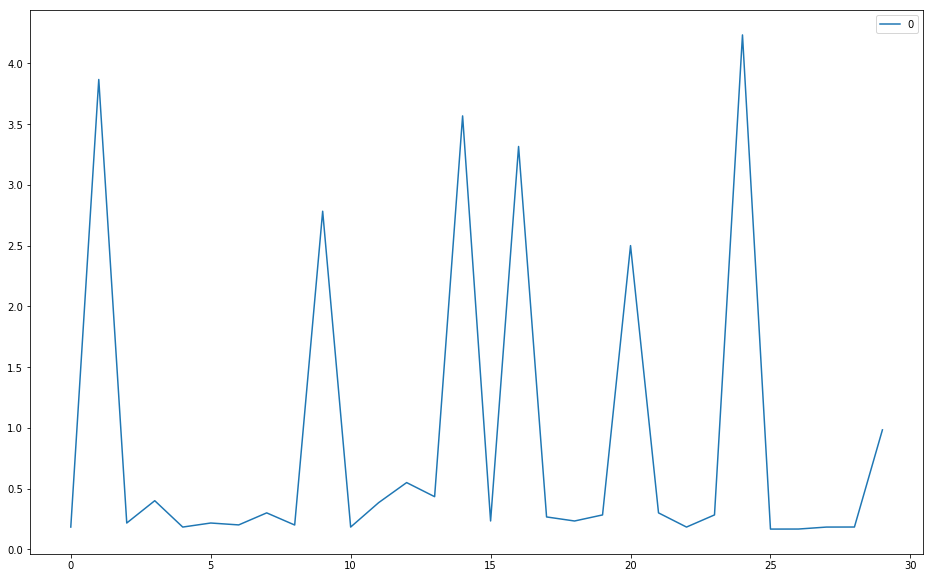

In [6]:
boardman_predict.plot(figsize=(16, 10))

In [7]:
# connell: create the features for model
y = connell_downtime[['Minutes']]
X = connell_downtime[['Asset', 'Super Reason', 'Reason Lvl1', 'Reason Lvl2', 'Shift', 'Hours']]
# dummy variables for categorical variables
X = pd.get_dummies(X)
# cross validation with train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0, solver='lsqr')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
connell_predict = clf.predict(X_test)[0:30]
connell_predict = pd.DataFrame(data=connell_predict)

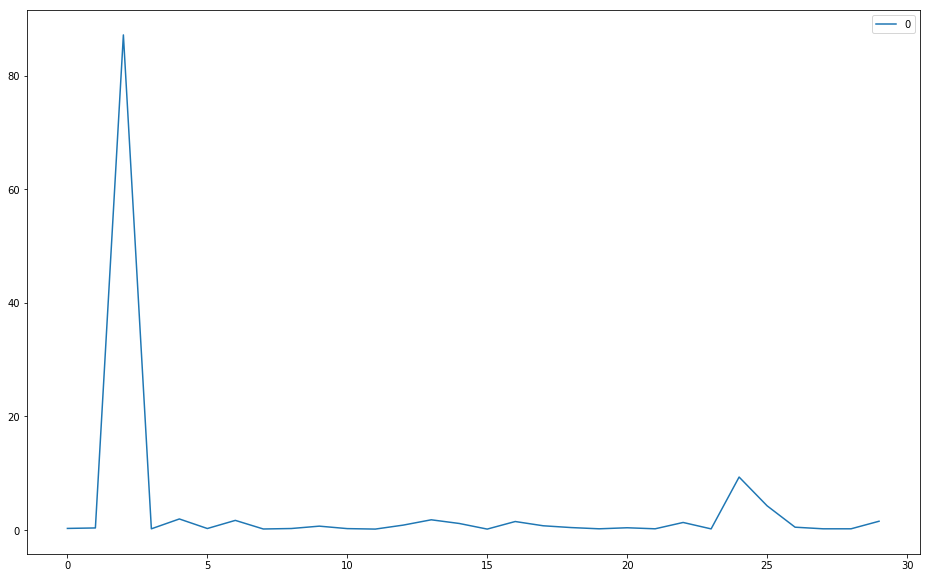

In [8]:
connell_predict.plot(figsize=(16, 10))

In [9]:
# delhi: create the features for model
y = delhi_downtime[['Minutes']]
X = delhi_downtime[['Asset', 'Super Reason', 'Reason Lvl1', 'Reason Lvl2', 'Shift', 'Hours']]
# dummy variables for categorical variables
X = pd.get_dummies(X)
# cross validation with train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0, solver='lsqr')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
delhi_predict = clf.predict(X_test)[0:30]
delhi_predict = pd.DataFrame(data=delhi_predict)

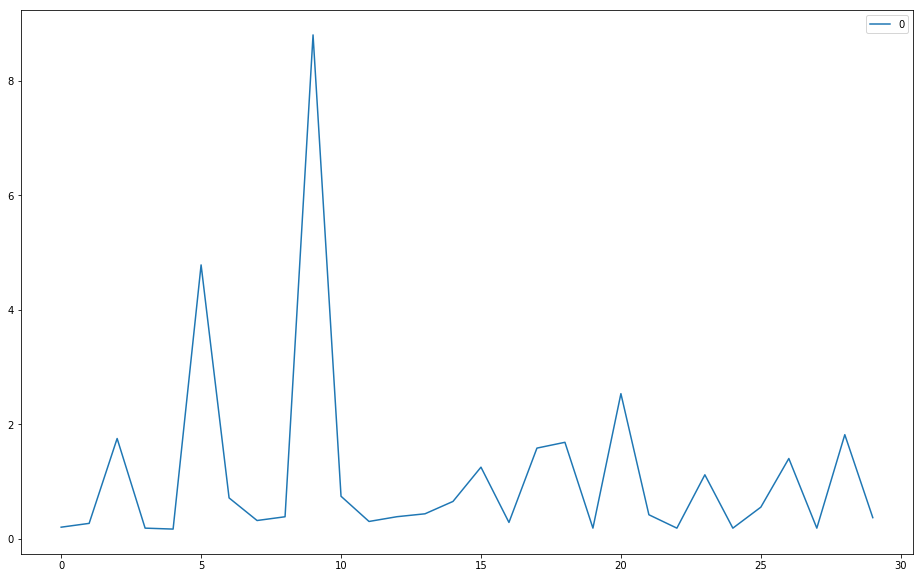

In [10]:
delhi_predict.plot(figsize=(16, 10))

In [11]:
# park_rapids: create the features for model
y = park_rapids_downtime[['Minutes']]
X = park_rapids_downtime[['Asset', 'Super Reason', 'Reason Lvl1', 'Reason Lvl2', 'Shift', 'Hours']]
# dummy variables for categorical variables
X = pd.get_dummies(X)
# cross validation with train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0, solver='lsqr')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
park_rapids_predict = clf.predict(X_test)[0:30]
park_rapids_predict = pd.DataFrame(data=park_rapids_predict)

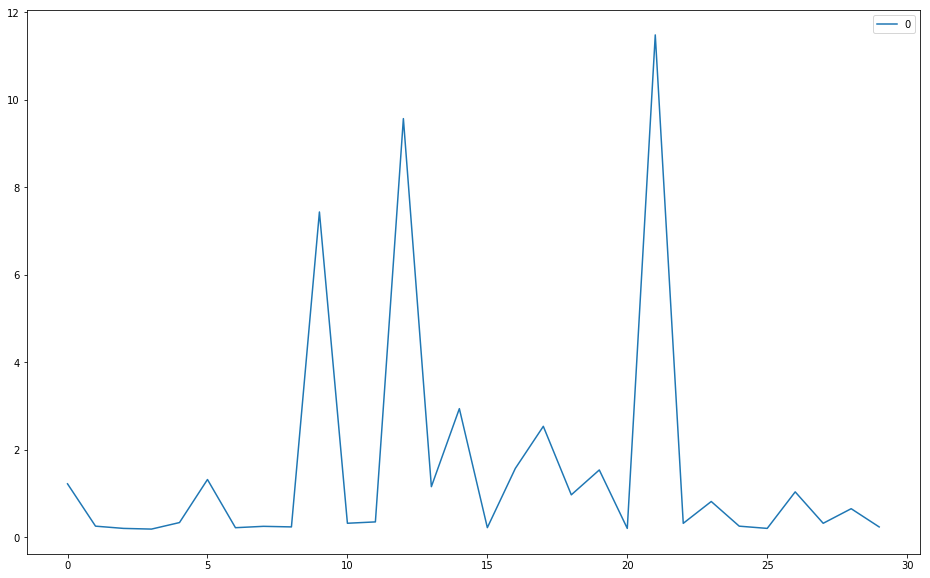

In [12]:
park_rapids_predict.plot(figsize=(16, 10))

In [13]:
# Pasco: create the features for model
y = pasco_downtime[['Minutes']]
X = pasco_downtime[['Asset', 'Super Reason', 'Reason Lvl1', 'Reason Lvl2', 'Shift', 'Hours']]
# dummy variables for categorical variables
X = pd.get_dummies(X)
# cross validation with train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0, solver='lsqr')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
pasco_predict = clf.predict(X_test)[0:30]
pasco_predict = pd.DataFrame(data=pasco_predict)

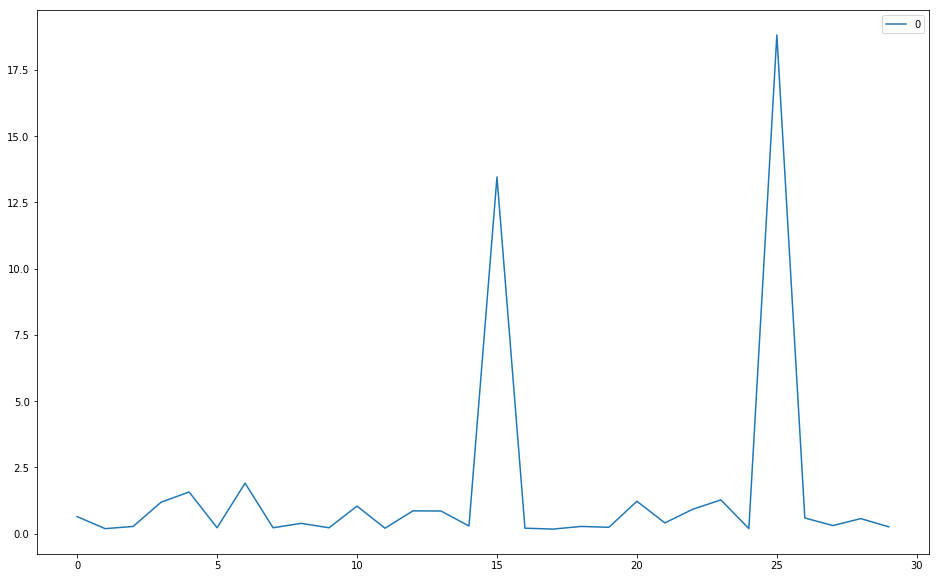

In [14]:
pasco_predict.plot(figsize=(16, 10))

In [15]:
# richland: create the features for model
y = richland_downtime[['Minutes']]
X = richland_downtime[['Asset', 'Super Reason', 'Reason Lvl1', 'Reason Lvl2', 'Shift', 'Hours']]
# dummy variables for categorical variables
X = pd.get_dummies(X)
# cross validation with train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0, solver='lsqr')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
richland_predict = clf.predict(X_test)[0:30]
richland_predict = pd.DataFrame(data=richland_predict)

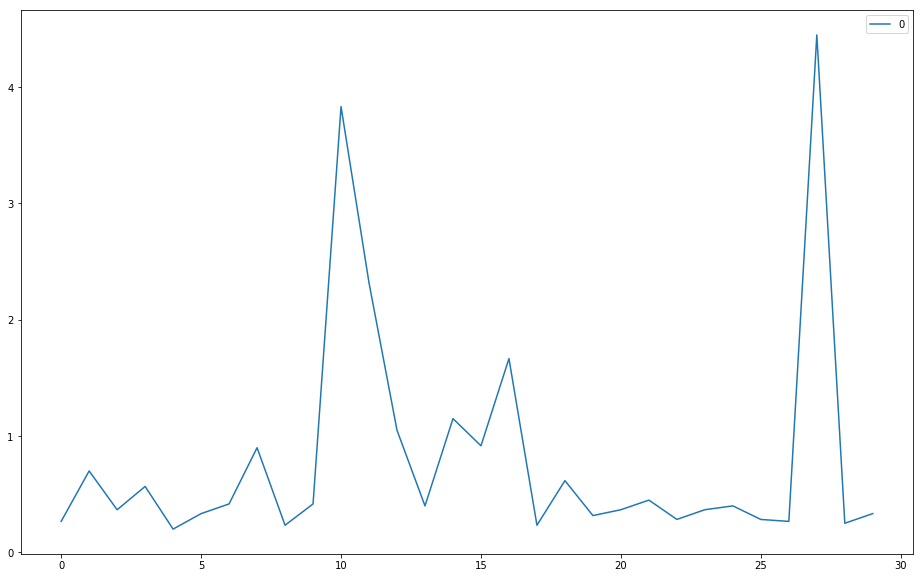

In [16]:
richland_predict.plot(figsize=(16, 10))